In [1]:
##Predict if patients are susceptible in going through Deep sleep

In [2]:
# import file

import csv

file_path = "datasets\\data2.csv"

with open(file_path, 'r') as csv_file:
    reader = csv.reader(csv_file)

In [3]:
# import packages

import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [4]:
dataset_file = file_path
df = pd.read_csv(dataset_file)
df.shape

(452, 13)

In [5]:
pd.set_option('display.max_columns', None)
print(df.head(5))
print(df.tail(5))

   Unnamed: 0  Age  Gender  Sleep duration  Sleep efficiency  \
0           0   65       1             6.0              0.88   
1           1   69       0             7.0              0.66   
2           2   40       1             8.0              0.89   
3           3   40       1             6.0              0.51   
4           4   57       0             8.0              0.76   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0                    18                     70                      12   
1                    19                     28                      53   
2                    20                     70                      10   
3                    23                     25                      52   
4                    27                     55                      18   

   Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  \
0         0.0                   0.0                  0.0               1   
1         3.0     

In [6]:
# features extracted for the models

X_df = df.drop(['Unnamed: 0', 'Age', 'Gender', 'REM sleep percentage', 'Light sleep percentage'], axis = 1)
y_df = df['Deep sleep percentage']

In [7]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 50)

In [8]:
X_train.shape, X_test.shape

((361, 8), (91, 8))

In [9]:
Counter(y_train), Counter(y_test)

(Counter({60: 58,
          55: 35,
          65: 32,
          57: 30,
          70: 28,
          35: 22,
          58: 22,
          25: 15,
          20: 14,
          67: 14,
          63: 14,
          22: 9,
          62: 8,
          59: 8,
          56: 7,
          72: 6,
          23: 6,
          52: 5,
          32: 5,
          28: 5,
          30: 5,
          24: 3,
          37: 2,
          75: 2,
          53: 2,
          51: 2,
          18: 1,
          40: 1}),
 Counter({65: 12,
          60: 12,
          55: 8,
          63: 6,
          70: 6,
          35: 5,
          57: 5,
          67: 5,
          20: 4,
          58: 4,
          30: 3,
          22: 3,
          25: 2,
          72: 2,
          23: 2,
          75: 2,
          56: 2,
          28: 2,
          37: 1,
          32: 1,
          24: 1,
          27: 1,
          62: 1,
          59: 1}))

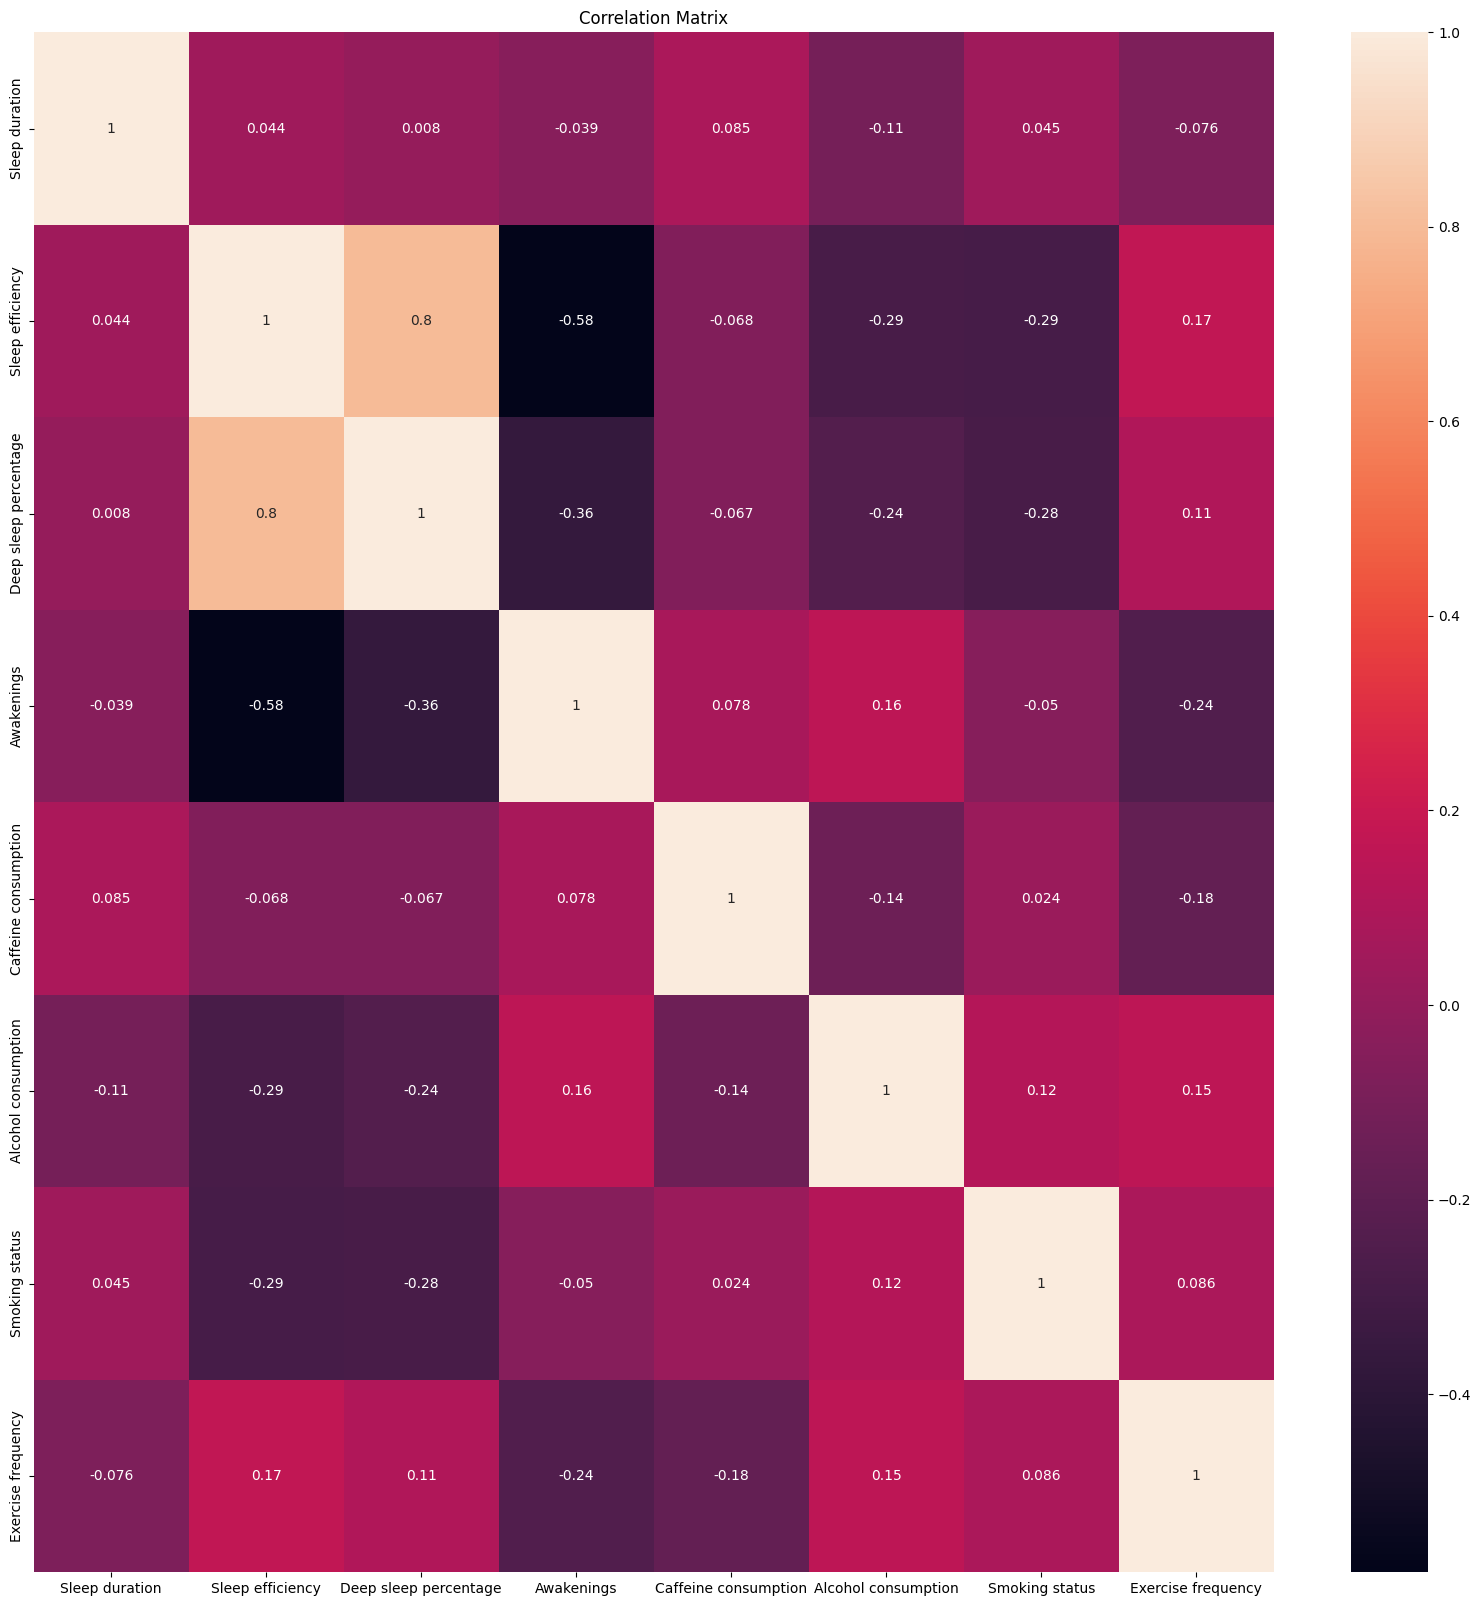

In [10]:
# performing a correlation matrix

corr_matrix = X_test.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# performing a random oversample only on the training set

oversampler = RandomOverSampler(random_state = 50)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [12]:
# gradient boosting

gb_model = GradientBoostingClassifier(random_state = 50)

gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=50)

In [13]:
y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

Gradient Boosting Accuracy: 0.9890


In [14]:
report = classification_report(y_test, y_pred)
print("Gradient Boosting Classification Report:")
print(report)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          20       1.00      1.00      1.00         4
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         2
          27       0.00      0.00      0.00         1
          28       0.67      1.00      0.80         2
          30       1.00      1.00      1.00         3
          32       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         5
          37       1.00      1.00      1.00         1
          55       1.00      1.00      1.00         8
          56       1.00      1.00      1.00         2
          57       1.00      1.00      1.00         5
          58       1.00      1.00      1.00         4
          59       1.00      1.00      1.00         1
          60       1.00      1.00      1

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

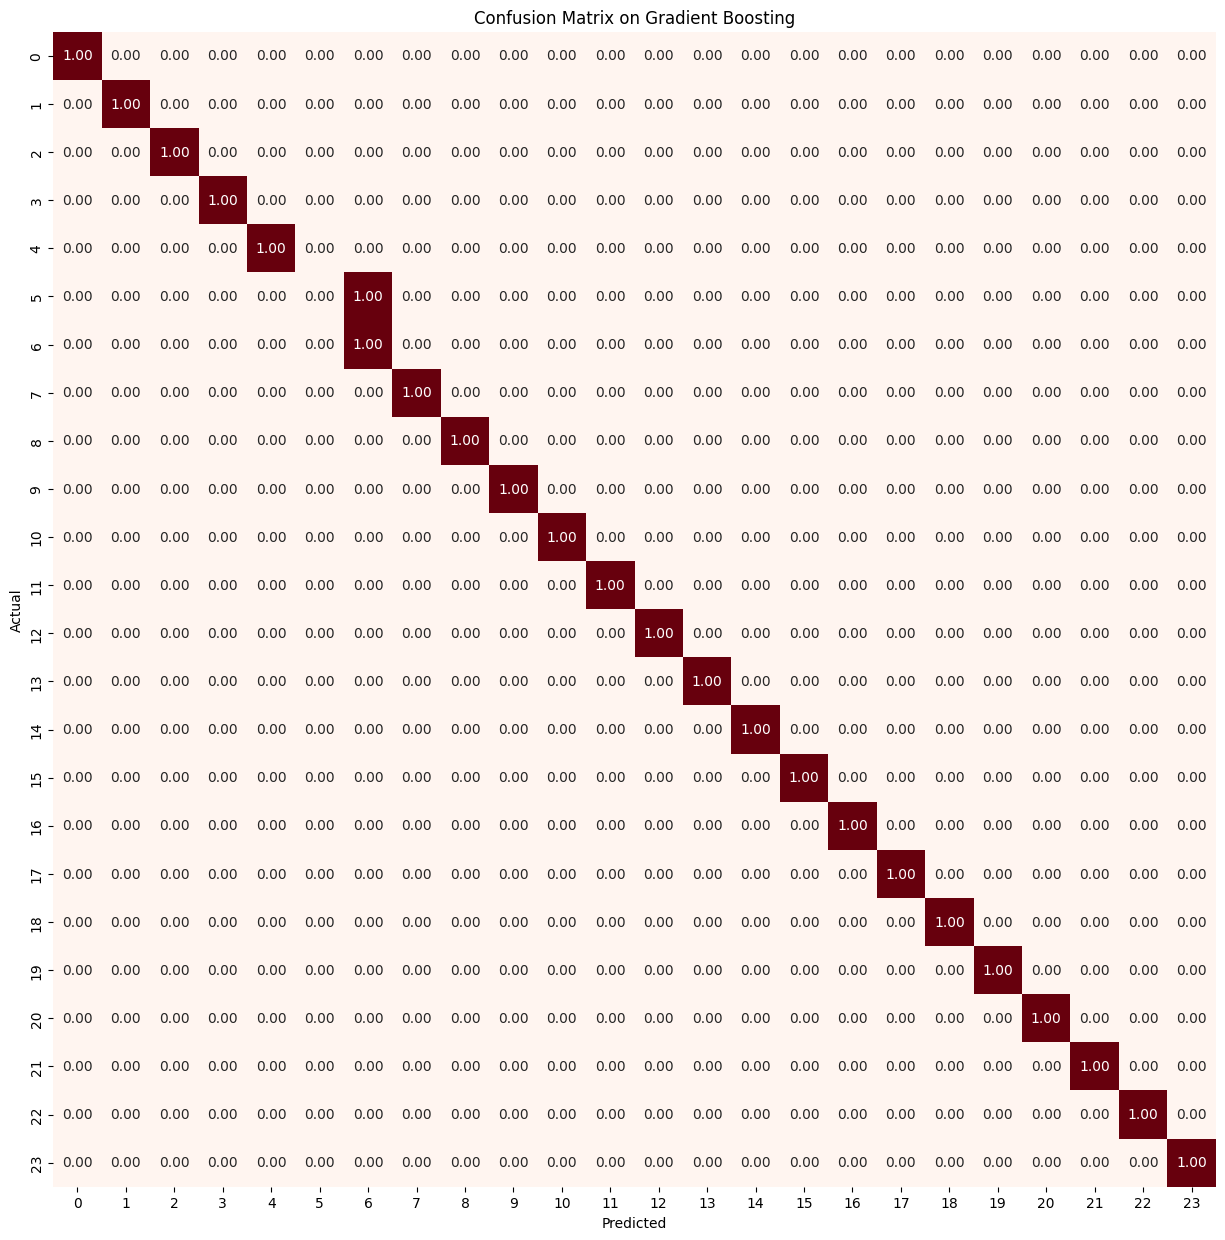

In [15]:
# confusion matrix on gradient boosting

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Gradient Boosting')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [16]:
# naive bayes model

nb_model = GaussianNB()

nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [17]:
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

Naive Bayes Accuracy: 0.9670


In [18]:
report = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(report)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

          20       1.00      1.00      1.00         4
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         2
          27       0.00      0.00      0.00         1
          28       0.67      1.00      0.80         2
          30       1.00      1.00      1.00         3
          32       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         5
          37       1.00      1.00      1.00         1
          55       1.00      1.00      1.00         8
          56       1.00      1.00      1.00         2
          57       1.00      1.00      1.00         5
          58       1.00      1.00      1.00         4
          59       1.00      1.00      1.00         1
          60       1.00      1.00      1.00   

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

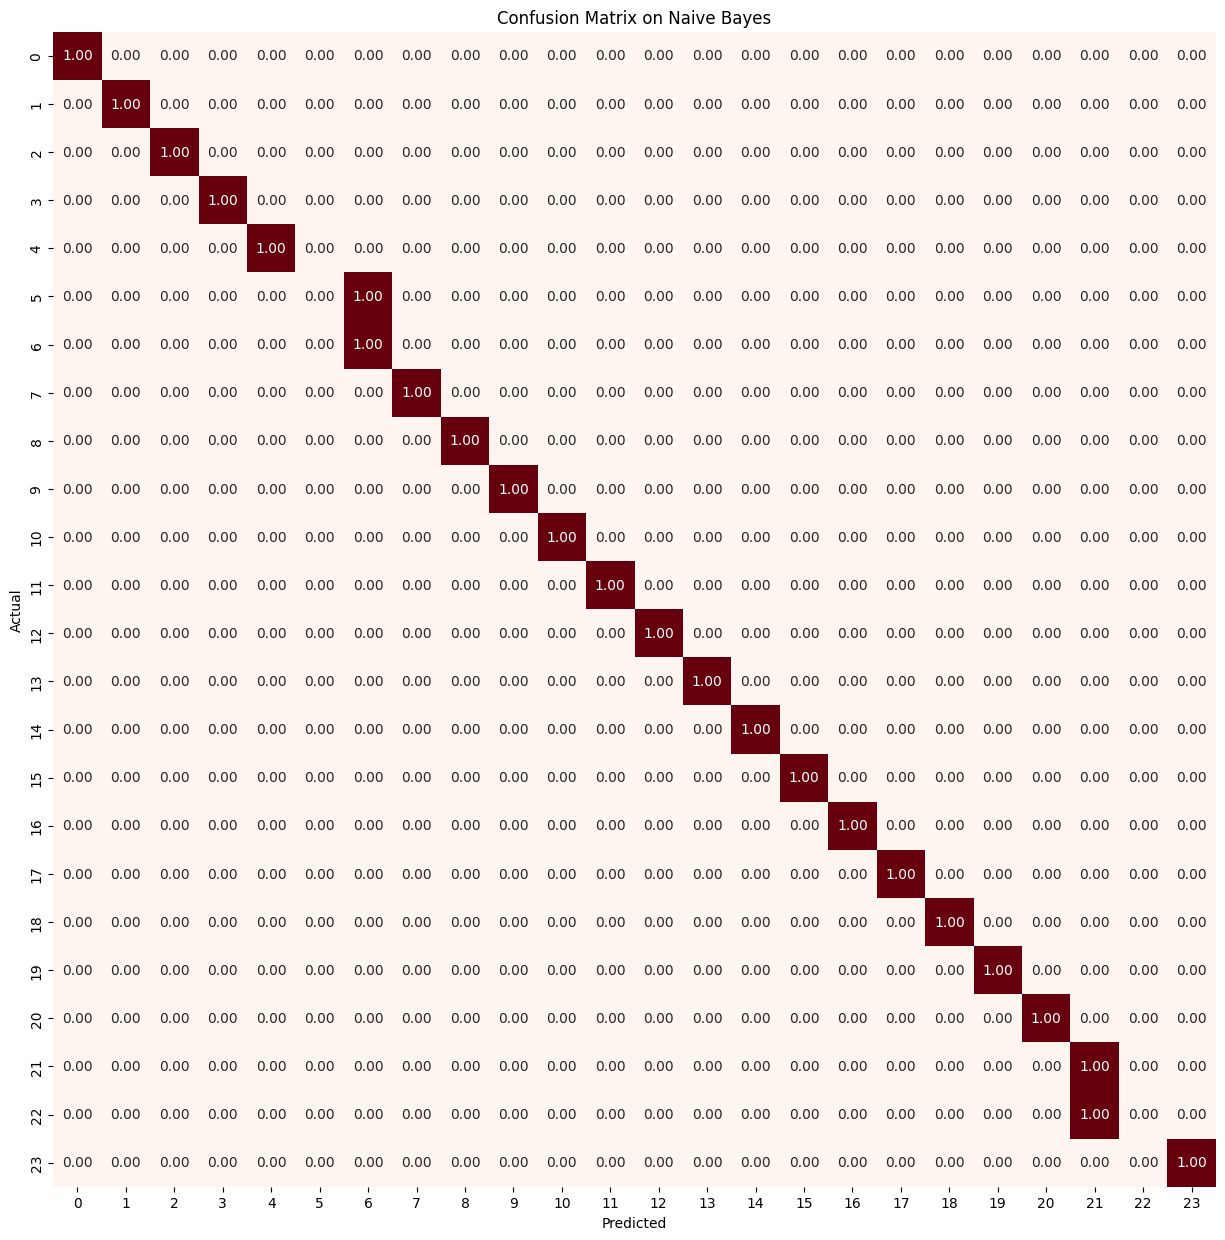

In [19]:
# confusion matrix on naive bayes

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on Naive Bayes')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [20]:
# logistic regression model

lr_model = LogisticRegression(random_state = 50)
lr_model.fit(X_train_resampled, y_train_resampled)


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [21]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Logistic Regression Accuracy:', accuracy)

Logistic Regression Accuracy: 0.23076923076923078


In [22]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         0
          20       1.00      0.75      0.86         4
          22       1.00      0.33      0.50         3
          23       0.00      0.00      0.00         2
          24       0.33      1.00      0.50         1
          25       0.50      0.50      0.50         2
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         2
          30       1.00      0.67      0.80         3
          32       1.00      1.00      1.00         1
          35       0.60      0.60      0.60         5
          37       0.20      1.00      0.33         1
          40       0.00      0.00      0.00         0
          52       0.00      0.00      0.00         0
          55       0.60      0.38      0.46         8
          56       0.25      1.00      0.40         2
          57       1.00      0.20      

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: Undefi

In [23]:
# cross-validation on logistic regression using repeated k-folds

lr_model = LogisticRegression(random_state = 50)

rkf = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 25)

accuracies = []

X_train_resampled = X_train_resampled.to_numpy() if isinstance(X_train_resampled, pd.DataFrame) else X_train_resampled
y_train_resampled = y_train_resampled.to_numpy() if isinstance(y_train_resampled, pd.Series) else y_train_resampled

for train_index, test_index in rkf.split(X_train_resampled):
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    lr_model.fit(X_train_fold, y_train_fold)

    y_pred = lr_model.predict(X_test_fold)

    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)

mean_accuracy = sum(accuracies) / len(accuracies)
std_accuracy = np.std(accuracies)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [24]:
print("Mean Repeated K-Folds CV Accuracy:", mean_accuracy)
print("Standard Deviation of Repeated K-Fold CV Accuracies:", std_accuracy)

Mean Repeated K-Folds CV Accuracy: 0.5246847103513772
Standard Deviation of Repeated K-Fold CV Accuracies: 0.03739276650930792
